In [33]:

# before running: 
# mkdir /wrk-vakka/users/horakons/carrington/plots/FHA/mp_io_coupling

import os
#os.environ['PATH'] = "/wrk-vakka/group/spacephysics/proj/appl/tex-basic/texlive/2023/bin/x86_64-linux:" + os.environ['PATH']
print(os.environ["PATH"])

import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ftest as ft
import pytools as pt
#from numba import jit
from myutils import cartesian_to_spherical, spherical_to_cartesian, mkdir_path, timer, timeseries, get_vlsvfile_fullpath
import scipy
import statsmodels.api as sm


global R_EARTH
R_EARTH = 6371000.
run = "FHA"  # FHA, FIA, EGL

'''
if run == "FIA":
    dir = "/wrk-vakka/group/spacephysics/vlasiator/3D/FIA/bulk_sidecars/ig_B"
elif run == "FHA":
    dir = "/wrk-vakka/group/spacephysics/vlasiator/3D/FHA/bulk1_sidecars/ig_B"
elif run == "EGL":
    dir = "/wrk-vakka/group/spacephysics/vlasiator/3D/EGL/sidecars/ig_B"
f = ft.f("/wrk-vakka/group/spacephysics/vlasiator/3D/FHA/bulk1_sidecars/ig_B/ionosphere_B_sidecar_FHA.0000784.vlsv")
'''

global START
global STOP
START = 1100       # FHA: 501-1612 (probably need > 1100? for connection coordinates)
STOP = 1598  #1350 #1598 #1612 (XO sidecars only exist for t<=1598 if kernel crashes ask for more memory in jupyter_server.sh)
#only available after t~1100s in FHA: 'vg_connection', 'vg_connection_coordinates_fw', 'vg_j_parallel',
#dct = timeseries(run, ['vg_connection_coordinates_fw', 'ig_fac', 'vg_beta_star', 'ig_upmappednodecoords', 'proton/vg_pressure', 'proton/vg_precipitationdifferentialflux'], START, STOP) 
dct = timeseries(run, [ 'ig_fac', 'vg_beta_star', 'ig_upmappednodecoords', 'proton/vg_pressure', 
                 'CellID', 'vg_coordinates'],  START, STOP) 
                 #'proton/vg_precipitationdifferentialflux']
dct_E_sidecar = timeseries(run, ['ig_E_north', 'ig_E_east'], START, STOP, filestem = '/wrk-vakka/users/horakons/carrington/data/FHA/GIC/ionosphere_gic_FHA_')
dct_XO_sidecar = timeseries(run, ['vg_lmn_neutral_line_distance', 'vg_dBNdL'], START, STOP, filestem='/wrk-vakka/group/spacephysics/vlasiator/3D/FHA/bulk1_sidecars/pysidecar_sdf_bulk1.')


#vg_fac_ts = dct['vg_j_parallel']
ig_fac_ts = dct['ig_fac']
vg_beta_star_ts = dct['vg_beta_star']
vg_pressure_ts = dct['proton/vg_pressure']
#vg_precipitation_ts = dct['proton/vg_precipitationdifferentialflux']
ig_upmappednodecoords_ts = dct['ig_upmappednodecoords']                         # -3e-16 to 3e-16 
ig_E_north_ts = dct_E_sidecar['ig_E_north']
ig_E_east_ts = dct_E_sidecar['ig_E_east']
vg_lmn_nld_ts = dct_XO_sidecar['vg_lmn_neutral_line_distance']   # <0.2 to find XO lines (what are the units?)
vg_dBNdL_ts = dct_XO_sidecar['vg_dBNdL']                         # -3e-16 to 3e-16 
cellid_ts = dct['CellID']                         # -3e-16 to 3e-16 

#>>> fw = f.read_parameter('vg_connection_coordinates_fw')
#Error: variable vg_connection_coordinates_fw/PARAMETER//pass not found in .vlsv file or in data reducers!

f = ft.f(get_vlsvfile_fullpath(run, STOP))
#vg_coordinates = f.read_variable("vg_coordinates")
vg_coordinates = dct['vg_coordinates'][0,:,:]
vg_r, vg_theta, vg_phi = cartesian_to_spherical(vg_coordinates[:,0], vg_coordinates[:,1], vg_coordinates[:,2])

#ig_coordinates = dct_E_sidecar['ig_r']   # this is locations of triangular elements (barycenters), NOT the same as node locations
ig_coordinates = f.get_ionosphere_node_coords()  # node locations (element corners): shape (21568, 3)
ig_r, ig_theta, ig_phi = cartesian_to_spherical(ig_coordinates[:,0], ig_coordinates[:,1], ig_coordinates[:,2])



28-Sep-24 00:27:47: Found population proton


/wrk-vakka/appl/easybuild/opt/Anaconda3/2023.09-0:/wrk-vakka/appl/easybuild/opt/Anaconda3/2023.09-0/sbin:/wrk-vakka/appl/easybuild/opt/Anaconda3/2023.09-0/bin:/appl/easybuild/opt/ImageMagick/7.1.1-15-GCCcore-12.3.0/bin:/appl/easybuild/opt/LittleCMS/2.15-GCCcore-12.3.0/bin:/appl/easybuild/opt/JasPer/4.0.0-GCCcore-12.3.0/bin:/appl/easybuild/opt/Ghostscript/10.01.2-GCCcore-12.3.0/bin:/appl/easybuild/opt/GTK3/3.24.37-GCCcore-12.3.0/bin:/appl/easybuild/opt/Wayland/1.22.0-GCCcore-12.3.0/bin:/wrk-vakka/appl/easybuild/opt/LLVM/16.0.6-GCCcore-12.3.0/bin:/appl/easybuild/opt/Pango/1.50.14-GCCcore-12.3.0/bin:/wrk-vakka/appl/easybuild/opt/FriBidi/1.0.12-GCCcore-12.3.0/bin:/wrk-vakka/appl/easybuild/opt/HarfBuzz/5.3.1-GCCcore-12.3.0/bin:/wrk-vakka/appl/easybuild/opt/ICU/73.2-GCCcore-12.3.0/sbin:/wrk-vakka/appl/easybuild/opt/ICU/73.2-GCCcore-12.3.0/bin:/appl/easybuild/opt/Gdk-Pixbuf/2.42.10-GCCcore-12.3.0/bin:/appl/easybuild/opt/DBus/1.15.4-GCCcore-12.3.0/bin:/wrk-vakka/appl/easybuild/opt/LibTIFF/4.5.

28-Sep-24 00:27:47: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:27:48: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:27:48: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:27:48: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:27:49: Found population proton


variable ig_fac not sortable by Cell ID!
variable ig_fac not sortable by Cell ID!


28-Sep-24 00:27:52: Found population proton
28-Sep-24 00:27:52: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:27:53: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:27:53: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:27:53: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:27:54: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:27:54: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:27:54: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:27:55: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:27:55: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:27:56: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:27:56: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:27:56: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:27:57: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:01: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:01: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:02: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:02: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:03: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:03: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:03: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:04: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:07: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:08: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:08: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:08: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:09: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:09: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:09: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:10: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:10: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:10: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:11: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:11: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:12: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:12: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:12: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:13: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:13: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:13: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:14: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:14: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:14: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:15: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:15: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:16: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:16: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:16: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:17: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:17: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:18: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:18: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:18: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:19: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:19: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:19: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:20: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:20: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:21: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:21: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:21: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:22: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:22: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:22: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:23: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:23: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:24: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:24: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:24: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:25: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:25: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:25: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:26: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:26: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:27: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:27: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:27: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:28: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:28: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:28: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:29: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:29: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:30: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:30: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:30: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:31: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:31: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:32: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:32: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:32: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:33: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:33: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:33: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:34: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:34: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:35: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:35: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:35: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:36: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:36: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:37: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:37: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:37: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:38: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:38: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:39: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:39: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:39: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:40: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:40: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:40: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:41: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:41: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:42: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:42: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:42: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:43: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:43: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:44: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:44: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:44: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:45: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:45: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:45: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:46: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:46: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:47: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:47: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:47: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:48: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:48: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:48: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:49: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:49: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:50: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:50: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:50: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:51: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:51: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:51: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:52: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:52: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:53: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:53: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:53: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:54: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:54: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:54: Found population proton


variable ig_fac not sortable by Cell ID!
variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:58: Found population proton
28-Sep-24 00:28:59: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:28:59: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:00: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:06: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:06: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:06: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:07: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:07: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:07: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:08: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:08: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:09: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:21: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:21: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:21: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:22: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:22: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:22: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:23: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:23: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:23: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:24: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:24: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:25: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:25: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:25: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:26: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:26: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:26: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:31: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:31: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:32: Found population proton


variable ig_fac not sortable by Cell ID!
variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:36: Found population proton
28-Sep-24 00:29:36: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:37: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:37: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:37: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:38: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:38: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:39: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:39: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:39: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:40: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:40: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:40: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:41: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:41: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:41: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:42: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:42: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:43: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:43: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:43: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:44: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:44: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:44: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:45: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:45: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:46: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:46: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:46: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:47: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:47: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:47: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:48: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:48: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:48: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:49: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:49: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:50: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:50: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:50: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:51: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:51: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:51: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:52: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:52: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:53: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:53: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:53: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:54: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:54: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:54: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:55: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:55: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:55: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:56: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:56: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:57: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:57: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:57: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:58: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:58: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:29:58: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:01: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:02: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:02: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:02: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:03: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:06: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:06: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:06: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:07: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:07: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:08: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:08: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:08: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:09: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:09: Found population proton


variable ig_fac not sortable by Cell ID!
variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:12: Found population proton
28-Sep-24 00:30:12: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:13: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:13: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:13: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:14: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:14: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:14: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:15: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:15: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:15: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:16: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:16: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:17: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:17: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:17: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:18: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:21: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:22: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:22: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:23: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:23: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:23: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:24: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:24: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:24: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:25: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:25: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:26: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:26: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:26: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:27: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:27: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:27: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:28: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:28: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:28: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:29: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:29: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:30: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:30: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:30: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:31: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:31: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:32: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:32: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:32: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:33: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:33: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:33: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:34: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:34: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:34: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:35: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:35: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:35: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:36: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:36: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:37: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:37: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:37: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:38: Found population proton


variable ig_fac not sortable by Cell ID!
variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:40: Found population proton
28-Sep-24 00:30:41: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:41: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:42: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:42: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:42: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:43: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:43: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:43: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:44: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:44: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:44: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:45: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:45: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:45: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:46: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:46: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:47: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:47: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:47: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:48: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:48: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:48: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:49: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:49: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:49: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:50: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:50: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:51: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:51: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:51: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:52: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:52: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:52: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:53: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:53: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:54: Found population proton


variable ig_fac not sortable by Cell ID!
variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:57: Found population proton
28-Sep-24 00:30:57: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:58: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:58: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:58: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:59: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:30:59: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:00: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:00: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:00: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:01: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:01: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:01: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:02: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:02: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:03: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:03: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:03: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:04: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:04: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:04: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:05: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:05: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:06: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:06: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:06: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:11: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:11: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:11: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:12: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:12: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:13: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:13: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:13: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:14: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:14: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:14: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:15: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:15: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:15: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:16: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:16: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:17: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:17: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:17: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:18: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:18: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:18: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:19: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:19: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:19: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:20: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:20: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:21: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:21: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:21: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:22: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:22: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:23: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:23: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:23: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:24: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:24: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:24: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:25: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:25: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:25: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:26: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:26: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:27: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:27: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:27: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:28: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:28: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:28: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:29: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:29: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:30: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:30: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:30: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:31: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:31: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:31: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:32: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:32: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:33: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:33: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:33: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:38: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:38: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:38: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:39: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:39: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:39: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:40: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:40: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:41: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:41: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:41: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:42: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:42: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:42: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:43: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:43: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:44: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:44: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:44: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:45: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:45: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:45: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:46: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:46: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:47: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:47: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:47: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:48: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:48: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:48: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:49: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:49: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:50: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:50: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:50: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:51: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:51: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:52: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:52: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:52: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:53: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:53: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:54: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:54: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:54: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:55: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:55: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:55: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:56: Found population proton


variable ig_fac not sortable by Cell ID!


28-Sep-24 00:31:57: Found population proton
28-Sep-24 00:31:58: Found population proton
28-Sep-24 00:31:58: Found population proton
28-Sep-24 00:31:59: Found population proton
28-Sep-24 00:32:00: Found population proton
28-Sep-24 00:32:01: Found population proton
28-Sep-24 00:32:02: Found population proton
28-Sep-24 00:32:03: Found population proton
28-Sep-24 00:32:03: Found population proton
28-Sep-24 00:32:04: Found population proton
28-Sep-24 00:32:05: Found population proton
28-Sep-24 00:32:06: Found population proton
28-Sep-24 00:32:07: Found population proton
28-Sep-24 00:32:08: Found population proton
28-Sep-24 00:32:08: Found population proton
28-Sep-24 00:32:09: Found population proton
28-Sep-24 00:32:13: Found population proton
28-Sep-24 00:32:13: Found population proton
28-Sep-24 00:32:14: Found population proton
28-Sep-24 00:32:15: Found population proton
28-Sep-24 00:32:16: Found population proton
28-Sep-24 00:32:17: Found population proton
28-Sep-24 00:32:17: Found popula

variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:08: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:09: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:09: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:09: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:10: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:10: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:10: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:14: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:14: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:15: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:15: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:16: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:16: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:16: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:17: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:17: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:17: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:18: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:18: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:18: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:19: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:19: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:19: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:20: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:20: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:21: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:21: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:21: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:22: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:22: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:22: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:23: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:26: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:27: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:27: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:27: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:28: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:28: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:29: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:29: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:30: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:30: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:30: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:31: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:31: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:32: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:32: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:32: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:33: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:33: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:34: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:34: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:34: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:35: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:35: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:36: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:36: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:36: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:37: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:37: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:38: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:38: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:38: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:39: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:39: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:39: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:40: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:40: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:41: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:41: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:41: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:42: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:42: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:43: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:43: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:47: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:48: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:48: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:49: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:49: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:49: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:50: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:50: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:50: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:51: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:51: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:52: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:52: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:52: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:53: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:53: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:53: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:54: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:56: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:57: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:57: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:58: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:58: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:58: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:59: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:59: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:40:59: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:00: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:00: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:01: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:01: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:01: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:02: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:02: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:02: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:03: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:03: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:03: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:04: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:04: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:05: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:05: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:05: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:06: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:06: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:07: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:07: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:07: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:11: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:12: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:12: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:13: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:13: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:13: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:14: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:14: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:15: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:15: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:15: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:16: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:16: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:17: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:17: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:17: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:18: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:18: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:18: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:19: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:19: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:20: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:20: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:20: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:21: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:21: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:21: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:22: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:22: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:22: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:23: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:23: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:24: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:24: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:24: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:25: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:25: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:25: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:26: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:26: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:26: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:27: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:27: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:28: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:28: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:28: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:29: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:29: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:29: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:30: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:30: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:30: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:31: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:31: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:31: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:32: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:32: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:32: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:33: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:33: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:34: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:34: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:34: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:35: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:35: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:36: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:36: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:36: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:36: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:37: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:37: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:38: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:38: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:38: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:39: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:39: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:39: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:40: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:40: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:40: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:41: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:41: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:41: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:42: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:42: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:43: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:43: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:43: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:44: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:44: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:44: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:45: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:45: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:46: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:46: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:46: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:47: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:47: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:47: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:48: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:48: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:49: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:49: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:49: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:50: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:50: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:50: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:51: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:51: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:51: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:52: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:52: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:52: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:53: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:53: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:53: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:54: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:54: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:55: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:55: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:55: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:56: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:56: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:56: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:57: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:57: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:57: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:58: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:58: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:58: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:59: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:59: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:41:59: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:00: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:00: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:01: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:01: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:01: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:02: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:02: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:02: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:03: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:03: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:04: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:04: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:04: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:05: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:05: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:05: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:06: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:06: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:06: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:07: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:07: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:07: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:08: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:08: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:09: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:09: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:09: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:10: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:10: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:10: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:11: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:11: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:11: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:12: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:12: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:13: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:13: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:13: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:16: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:16: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:17: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:17: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:17: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:18: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:18: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:19: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:19: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:19: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:20: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:20: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:20: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:21: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:21: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:22: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:22: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:22: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:23: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:23: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:23: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:24: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:24: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:24: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:25: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:25: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:25: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:26: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!
variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:29: Found population proton
28-Sep-24 00:42:29: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:30: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:30: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:31: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:31: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:31: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:32: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:32: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:32: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:33: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:33: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:33: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!
variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:37: Found population proton
28-Sep-24 00:42:37: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:37: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:40: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:41: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:41: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:41: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:42: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:42: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:42: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:43: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:43: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:43: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:44: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:44: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:44: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!
variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:48: Found population proton
28-Sep-24 00:42:49: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:49: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:50: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:50: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:50: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:51: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:51: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:51: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:52: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:52: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:52: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:53: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:53: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:53: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:54: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:54: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:54: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:55: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:55: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:56: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:56: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:56: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:42:57: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!
variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:01: Found population proton
28-Sep-24 00:43:01: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:01: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:02: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:02: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:03: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:03: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:03: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:04: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:04: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:04: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:05: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:05: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:06: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:06: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:06: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:07: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:07: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:07: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:08: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:08: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:09: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:09: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:09: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:10: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:10: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:10: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:11: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:11: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!
variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:14: Found population proton
28-Sep-24 00:43:14: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:14: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:15: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:15: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:15: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:16: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:16: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:16: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:17: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:17: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:18: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:18: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:18: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:19: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:19: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:19: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:20: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:20: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:20: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:21: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:21: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:21: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:22: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:22: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:23: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:23: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:23: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:24: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:24: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:24: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:25: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:25: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:26: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:26: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:29: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:29: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:29: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:30: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:30: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:31: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:31: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:31: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:32: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:32: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:33: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:33: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:33: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:34: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:38: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:38: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:38: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:39: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:39: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:40: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:44: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:46: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:46: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!
variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:51: Found population proton
28-Sep-24 00:43:51: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:51: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:52: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:52: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:53: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:57: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:57: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:58: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:58: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:58: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:59: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:59: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:43:59: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:00: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:00: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:01: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:01: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:01: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:02: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:02: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:02: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:03: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:03: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:04: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:04: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:04: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:05: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:05: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:06: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:06: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:06: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:07: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:07: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:08: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:08: Found population proton


variable ig_upmappednodecoords not sortable by Cell ID!


28-Sep-24 00:44:08: Found population proton
28-Sep-24 00:44:09: Found population proton
28-Sep-24 00:44:09: Found population proton
28-Sep-24 00:44:10: Found population proton
28-Sep-24 00:44:10: Found population proton
28-Sep-24 00:44:11: Found population proton
28-Sep-24 00:44:11: Found population proton
28-Sep-24 00:44:12: Found population proton
28-Sep-24 00:44:12: Found population proton
28-Sep-24 00:44:13: Found population proton
28-Sep-24 00:44:13: Found population proton
28-Sep-24 00:44:14: Found population proton
28-Sep-24 00:44:14: Found population proton
28-Sep-24 00:44:15: Found population proton
28-Sep-24 00:44:15: Found population proton
28-Sep-24 00:44:16: Found population proton
28-Sep-24 00:44:16: Found population proton
28-Sep-24 00:44:17: Found population proton
28-Sep-24 00:44:17: Found population proton
28-Sep-24 00:44:18: Found population proton
28-Sep-24 00:44:18: Found population proton
28-Sep-24 00:44:19: Found population proton
28-Sep-24 00:44:19: Found popula

variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable ig_E_north not sortable by Cell ID!
variable i

28-Sep-24 01:11:13: Found population proton


In [34]:
# Fasil used a function like this to catch FTEs... not sure if I'll need it

def radial_line(theta, phi, r_arr, theta_arr, phi_arr,  delta = 2., r_range = [8*R_EARTH, 15*R_EARTH]):
    '''
        select all cells that "intersect" a radial line.

        Inputs:
            theta, phi: scalars specifying the radial line in spherical coordinates [degrees]
            theta_arr, phi_arr, r_arr: 1D arrays of cell locations in the grid 

        Returns:
            1D array of indices corresponding with the cells on the line

         indices where theta_arr and phi_arr are within delta of thet specified theta, phi
            AND r_arr is in r_range
    '''
    index = np.where( (np.abs(theta_arr - theta) < delta) & (np.abs(phi_arr-phi) < delta) 
                       & (r_arr > r_range[0]) & (r_arr < r_range[1]))[0]
    #print(index.size, ' points')
    #print(r_arr[index] / R_EARTH)
    return index

ind_line = radial_line(45., 0., vg_r, vg_theta*180./np.pi, vg_phi*180./np.pi, delta = 2., r_range = [8*R_EARTH, 9*R_EARTH]) 


In [35]:
# Select cells that map along the B-field to the point ig_testcoord
def calc_mindist_ind(array_2d, vec):
    # vec is 1D, N elements. Here, N=3 for 3D space
    # array_2d is [:, N]
    d = array_2d - vec
    d1 = np.linalg.norm( d, axis =1)
    return np.argmin(d1)


def vg_test_point_index(ig_testcoord, ind_vg, fw, ig_coordinates, vg_r, vg_theta, vg_coordinates, vg_lmn_nld_ts, vg_beta_star_ts, nld):
    # returns
    # ind_mindist: an index in the vg_grid that is near a null (X- or O-) point at some time
    #   connected along a field line to the point ig_testcoord
    #   steps:
    #   1. START with a list of inner magnetospheric indices, ind_vg, that are connected to ig_testcoord
    #   2. select the coordinate with the largest r from among those indexed by ind_vg, call it thiscoord
    #   3. from all times, from all null points on the SW side of the magnetopause, find the one that is nearest to thiscoord
    #   the index from (3) is returned as ind_mindist

    # from a given position, find the nearest neutral line position from all times
    this_vg_ind = ind_vg[-1] # use the point on the field line with largest vg_r
    thiscoord = vg_coordinates[this_vg_ind, :]
    ind_mindist = 0 # dummy
    mindist = R_EARTH * 1e6   # dummy
    for i in range(STOP - START + 1):
        # from all times, from all null points on the SW side of the magnetopause, find the one that is nearest to thiscoord
        ind_nl = np.where( (vg_lmn_nld_ts[i, :] < nld) & (vg_r > min_nl_radius) & (vg_beta_star_ts[i, :] > 1) & (vg_coordinates[:,0] > 9*R_EARTH))[0]   # check all times for neutral lines   
        d_nl = vg_coordinates[ind_nl, :] - thiscoord
        d1_nl = np.linalg.norm( d_nl, axis =1)
        i_nl = np.argmin(d1_nl)
        mindist_nl = d1_nl[i_nl]
        if mindist_nl < mindist:
            mindist = mindist_nl
            ind_mindist = ind_nl[i_nl]
            print(ind_mindist)
    return ind_mindist



In [36]:
def calc_XO_FTE(ind_vg_plot, vg_coordinates, vg_lmn_nld_ts, vg_dBNdL_ts, nld=0.2, r_range=None, cleanup = False, nulls = 'XO'):
    # find nominal times when FTE (X or O line) passes through cell indexed by ind_vg_plot
    # nld: keyword setting the maximum distance to the nearest neutral line 
    # r_range = [r_min, r_max] or None
    # nulls: = 'XO', 'X', or 'O' 
    XO = np.zeros(vg_dBNdL_ts.shape[0])
    if r_range is None:
        ind_FTE_tmp = np.where(vg_lmn_nld_ts[:, ind_vg_plot] < nld)[0]
        # XO
        XO[ind_FTE_tmp] = np.sign(vg_dBNdL_ts[ind_FTE_tmp, ind_vg_plot])
    else:   # count as an FTE if *any* FTE on a radial line segment in [r_min, r_max]
        r, theta, phi = cartesian_to_spherical(vg_coordinates[:, 0], vg_coordinates[:, 1], vg_coordinates[:, 2])
        vg_inds = radial_line(theta[ind_vg_plot]*180./np.pi, phi[ind_vg_plot]*180./np.pi, r, theta*180./np.pi, phi*180./np.pi, delta = 2., r_range = r_range)
        #print(vg_inds.size)
        for vg_i in vg_inds:
            i_temp = np.where(vg_lmn_nld_ts[:, vg_i] < nld)[0]
            XO[i_temp] = np.sign(vg_dBNdL_ts[i_temp, vg_i])   # note, this is quite a klug, because and X and O null point could exist simultaneously on the same radial line
    if cleanup:     # handle duplicates that are at nearby times (count only the first in a series)
        dt = 30     # seconds (make this a keyword?)
        test = 0
        testind = 0
        for i, pm1 in enumerate(XO):
            if (pm1 != 0):
                if (pm1 == test) & (i-testind <= dt):
                    XO[i] = 0 # suppress duplicates that are at nearby times
                else:
                    test = pm1
                    testind = i
    if nulls == 'X':
        XO[XO < 0] = 0  # only count Xs
    elif nulls == 'O':
        XO[XO > 0] = 0  # only keep Os
    ind_FTE = np.where((XO != 0))[0]    
    # else do nothing (code finds Xs and Os by default)          
    return XO, ind_FTE


def plot_2vars(time, plot_var1, plot_var2, ylim1=None, ylim2=None, ylabel1='', ylabel2 = '', label1='', label2='', ccf = True):
    fig,ax1 = plt.subplots()
    ax2=ax1.twinx()
    # first plot
    ax1.plot(time, plot_var1, color = "C0", label = label1)
    ax1.set_ylabel(ylabel1,color="C0",fontsize=18)
    ax1.set_ylim([ylim1[0], ylim1[1]])
    # make a plot with different y-axis using second axis object
    ax2.plot(time, plot_var2, color = "C1", label = label2)
    ax2.set_ylabel(ylabel2, color="C1",fontsize=18)
    ax2.set_ylim([ylim2[0], ylim2[1]])
    ax1.legend(loc = 'upper center', framealpha = 1)
    ax2.legend(loc = 'lower center', framealpha = 1)
    if ccf: 
        this_ccf = sm.tsa.stattools.ccf(plot_var1, plot_var2, adjusted=False)
    plt.title('ccf = {}'.format(np.nanmax(np.abs(this_ccf))))
    plt.tight_layout()
    return fig, ax1, ax2



In [37]:
##fw = dct['vg_connection_coordinates_fw']   # shape (nfiles, 4012332, 3)
#fw = np.repeat(f.read_variable('vg_connection_coordinates_fw')[None, :, :], STOP-START+1, axis = 0)

nld = 0.2   # can't catch further FTEs by increasing nld, becuase this proxy uses a linear approximation of the magnetic field (linear term in Taylor expansion) to estimate the location of nulls

### Pick the ionospheric point (index ind_ig_plot), and a magnetospheric point (index ind_vg_plot)

##############
'''

# APPROACH 1: pick an ionospheric point and find a magnetospheric point that is near its field line, 
# that also contains a null point at some time

# choose a point 'ig_testcoord' on the ionosphere (sphere at 1RE)
latitude = 80. * np.pi / 180.
theta = np.pi/2. - latitude
phi = 15. * np.pi / 180.
ig_testcoord = np.array(spherical_to_cartesian(R_EARTH, theta , phi ))

# Select cells that map along the B-field to the point ig_testcoord
#d_ig = ig_coordinates - ig_testcoord
#d1_ig = np.linalg.norm( d_ig, axis =1)
#ind_ig_plot = np.argmin(d1_ig)
ind_ig_plot = calc_mindist_ind(ig_coordinates, ig_testcoord)

#print(ig_coordinates[0, ind_ig_plot, :])
print(ig_coordinates[ind_ig_plot, :])
print(ig_testcoord)

# ind_vg: the indices of the vg_ grid that downmap to nearby (distance<delta_x) 
#         to a location ig_testcoord in the ionosphere.
#         also these vg_ grid locations are restricted in radius and to northern hemisphere (colatitude theta)
fw_test = fw[0,:,:]
d = fw_test - ig_testcoord
d1 = np.linalg.norm( d, axis =1)
delta_x = 2e5  # in meters,  1.2e5
min_nl_radius = 9* R_EARTH
ind_vg = np.where((d1 < delta_x) & (vg_r > 5.2*R_EARTH) & (vg_r < min_nl_radius) & (vg_theta < np.pi/2))[0]
# sort ind_vg by radius
i_temp = np.argsort(vg_r[ind_vg])
ind_vg = ind_vg[i_temp]

# ind_vg_plot is an index in the vg_grid, that is ~connected along a field line to the point ig_testcoord
ind_vg_plot = vg_test_point_index(ig_testcoord, ind_vg, fw, ig_coordinates, vg_r, vg_theta, vg_coordinates, vg_lmn_nld_ts, vg_beta_star_ts, nld)



##############

# APPROACH 2: pick the magnetospheric point, and find where it maps down to the ionosphere
# PICK a point in the magnetosphere, to make time series of FTEs

dct_cellid_to_vg_index = f.get_cellid_locations()
#vg_testcoord = np.array([10.444467116622194, 1.15696123057604772, 2.2595824831266675])*R_EARTH  # location of an FTE in FHA run, t=1125s (verified in visit)
vg_testcoord = np.array([6.762015382200596, 0.31392246115209543, 8.203107832365406]) * R_EARTH  # cusp FTE, t=1420s
#vg_testcoord = np.array([9.5, 0.86, 3.69]) * R_EARTH  # cusp FTE, t=1420s
#vg_testcoord = np.array([10.67562392089154, 0.15696123057604772, 0.5280897818238895]) * R_EARTH # equatorial FTE t=1420s
cellid_testcoord = f.get_cellid(vg_testcoord)
ind_vg_plot = dct_cellid_to_vg_index[cellid_testcoord]
print(vg_coordinates[ind_vg_plot, :]/R_EARTH)  # ~matches (as expected)

ig_testcoords = fw[:,ind_vg_plot,:]   # where magnetospheric point maps to, all times
ig_radius = np.linalg.norm(ig_testcoords, axis = -1)
ind_temp = np.where(ig_radius < 1.5 *R_EARTH)[0]  # only consider points that map to the ionosphere
ig_testcoord = ig_testcoords[ind_temp[0],:]       # pick first point, arbitrarily

ind_ig_plot = ind_temp[calc_mindist_ind(ig_coordinates[ind_temp,:], ig_testcoord)]

'''

##############

# APPROACH 3: Hard code both the ig and vg test coordinates

ind_ig_plot = 8       # ig index for plots I shared in meeting ~15.3. found with np.argmin(np.abs(ig_ccfs - 0.10897546723564523))
ig_testcoord = ig_coordinates[ind_ig_plot, :]

#ig_testcoord = np.array([0.19, 0.05, 0.9884331034521254])*R_EARTH
#ind_ig_plot = calc_mindist_ind(ig_coordinates, ig_testcoord)

vg_testcoord = vg_coordinates[242520,:]
#vg_testcoord = np.array([9.5, 0.86, 3.69])*R_EARTH
ind_vg_plot = calc_mindist_ind(vg_coordinates, vg_testcoord)


##############


# PLOT magnetospheric XO proxies overlaid on mapped ionospheric variables
#ind_plot_list = ind_vg[-2:-1]    # ind_vg
ind_plot_list = [ind_vg_plot]
time = np.arange(START, STOP+1)
for i, i_vg in enumerate(ind_plot_list):
    print(cellid_ts[:,i_vg])
    cid = cellid_ts[0,i_vg]
    # vg XO proxy (-1 to 1) vs. ig FACs
    ylim2 = [-4e-7, 4e-7]
    #XO, ind_FTE = calc_XO_FTE(i_vg, vg_coordinates, vg_lmn_nld_ts, vg_dBNdL_ts, nld = nld, r_range = [vg_r[i_vg]-R_EARTH, vg_r[i_vg]+R_EARTH], cleanup=True, nulls = 'O')
    XO, ind_FTE = calc_XO_FTE(i_vg, vg_coordinates, vg_lmn_nld_ts, vg_dBNdL_ts, nld = nld, r_range = None, cleanup=True, nulls = 'O')
    #print(ind_FTE)
    fig, ax1, ax2 = plot_2vars(time, vg_pressure_ts[:,i_vg], ig_fac_ts[:, ind_ig_plot], ylim1=[None, None], ylim2=ylim2, 
                               ylabel1=r'Thermal Pressure [Pa]', ylabel2 = r'ig_fac $[A/m^2]$', 
                               label1= 'M-sphere {} RE'.format(np.array2string(vg_coordinates[i_vg, :] / R_EARTH, precision = 2)), 
                               label2='I-sphere {} RE'.format(np.array2string(ig_testcoord / R_EARTH, precision=2)))
#    fig, ax1, ax2 = plot_2vars(time, XO, ig_fac_ts[:, ind_ig_plot], ylim1=[-1.5, 1.5], ylim2=ylim2, 
#                               ylabel1=r'sign($dB_N/dL$) [X=1, O=-1]', ylabel2 = r'ig_fac $[A/m^2]$', 
#                               label1= 'M-sphere {} RE'.format(np.array2string(vg_coordinates[i_vg, :] / R_EARTH, precision = 2)), 
#                               label2='I-sphere {} RE'.format(np.array2string(ig_testcoord / R_EARTH, precision=2)))
    for i_FTE in ind_FTE:       # XO lines (vertical markers)
        ax2.plot([START + i_FTE, START + i_FTE], ylim2, linestyle ='--', color = 'C2')
    filename = '/wrk-vakka/users/horakons/carrington/plots/FHA/mp_io_coupling/mp_io_{}_vg_{}_cid_{}_ig_{}.png'.format(run, i, cid, ind_ig_plot)
    print(filename)
    plt.savefig(filename)
    plt.close()


print(ig_testcoord / R_EARTH)
print(vg_testcoord / R_EARTH)



[242521 242521 242521 242521 242521 242521 242521 242521 242521 242521
 242521 242521 242521 242521 242521 242521 242521 242521 242521 242521
 242521 242521 242521 242521 242521 242521 242521 242521 242521 242521
 242521 242521 242521 242521 242521 242521 242521 242521 242521 242521
 242521 242521 242521 242521 242521 242521 242521 242521 242521 242521
 242521 242521 242521 242521 242521 242521 242521 242521 242521 242521
 242521 242521 242521 242521 242521 242521 242521 242521 242521 242521
 242521 242521 242521 242521 242521 242521 242521 242521 242521 242521
 242521 242521 242521 242521 242521 242521 242521 242521 242521 242521
 242521 242521 242521 242521 242521 242521 242521 242521 242521 242521
 242521 242521 242521 242521 242521 242521 242521 242521 242521 242521
 242521 242521 242521 242521 242521 242521 242521 242521 242521 242521
 242521 242521 242521 242521 242521 242521 242521 242521 242521 242521
 242521 242521 242521 242521 242521 242521 242521 242521 242521 242521
 24252

In [38]:
'''
# PLOT magnetospheric XO proxies overlaid on mapped ionospheric variables
#ind_plot_list = ind_vg[-2:-1]    # ind_vg
ind_plot_list = [ind_vg_plot]
time = np.arange(START, STOP+1)
for i, i_vg in enumerate(ind_plot_list):
    # vg XO proxy (-1 to 1) vs. ig FACs
    ylim2 = [-4e-7, 4e-7]
    XO, ind_FTE = calc_XO_FTE(i_vg, vg_coordinates, vg_lmn_nld_ts, vg_dBNdL_ts, nld = nld, r_range = [vg_r[i_vg]-R_EARTH, vg_r[i_vg]+R_EARTH], cleanup=True, nulls = 'O')
    #print(ind_FTE)
    dnf_bin = 4
    fig, ax1, ax2 = plot_2vars(time, vg_pressure_ts[:,i_vg], vg_precipitation_ts [:, i_vg, dnf_bin], ylim1=[None, None], ylim2=ylim2, 
                               ylabel1=r'Thermal Pressure [Pa]', ylabel2 = 'DNF {} eV '.format(f.read_parameter('proton_PrecipitationCentreEnergy{}'.format(dnf_bin))) + '[SI units]', 
                               label1= 'M-sphere {} RE'.format(np.array2string(vg_coordinates[i_vg, :] / R_EARTH, precision = 2)), 
                               label2= 'M-sphere {} RE'.format(np.array2string(vg_coordinates[i_vg, :] / R_EARTH, precision = 2)))
    for i_FTE in ind_FTE:       # XO lines (vertical markers)
        ax2.plot([START + i_FTE, START + i_FTE], ylim2, linestyle ='--', color = 'C2')
    filename = '/wrk-vakka/users/horakons/carrington/plots/FHA/mp_io_coupling/mp_mp_{}_vg_{}.png'.format(run, i)
    plt.savefig(filename)
    plt.close()
'''



"\n# PLOT magnetospheric XO proxies overlaid on mapped ionospheric variables\n#ind_plot_list = ind_vg[-2:-1]    # ind_vg\nind_plot_list = [ind_vg_plot]\ntime = np.arange(START, STOP+1)\nfor i, i_vg in enumerate(ind_plot_list):\n    # vg XO proxy (-1 to 1) vs. ig FACs\n    ylim2 = [-4e-7, 4e-7]\n    XO, ind_FTE = calc_XO_FTE(i_vg, vg_coordinates, vg_lmn_nld_ts, vg_dBNdL_ts, nld = nld, r_range = [vg_r[i_vg]-R_EARTH, vg_r[i_vg]+R_EARTH], cleanup=True, nulls = 'O')\n    #print(ind_FTE)\n    dnf_bin = 4\n    fig, ax1, ax2 = plot_2vars(time, vg_pressure_ts[:,i_vg], vg_precipitation_ts [:, i_vg, dnf_bin], ylim1=[None, None], ylim2=ylim2, \n                               ylabel1=r'Thermal Pressure [Pa]', ylabel2 = 'DNF {} eV '.format(f.read_parameter('proton_PrecipitationCentreEnergy{}'.format(dnf_bin))) + '[SI units]', \n                               label1= 'M-sphere {} RE'.format(np.array2string(vg_coordinates[i_vg, :] / R_EARTH, precision = 2)), \n                               label2= 'M

In [39]:

# test ionosphere. Does mapping change with time? Answer, not really

plt.plot(time, ig_upmappednodecoords_ts[:, ind_ig_plot, 0]/R_EARTH, label = 'x')
plt.plot(time, ig_upmappednodecoords_ts[:, ind_ig_plot, 1]/R_EARTH, label = 'y')
plt.plot(time, ig_upmappednodecoords_ts[:, ind_ig_plot, 2]/R_EARTH, label = 'z')
plt.ylabel('Upmapped coordinate [R_E]')
plt.xlabel('time')
plt.title('Upmapping from {}'.format(np.array(ig_testcoord)/R_EARTH))
plt.legend()
plt.savefig('/wrk-vakka/users/horakons/carrington/plots/FHA/mp_io_coupling/ionosphere_upmappedcoords_{}.png'.format(run))   # make this mp_io_coupling/ directory
plt.close()


In [40]:
import statsmodels.api as sm

#calculate cross correlation
ccf = sm.tsa.stattools.ccf(XO,  ig_fac_ts[:, ind_ig_plot], adjusted=False)


28-Sep-24 01:11:15: /proj/horakons/conda/myconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1119: RuntimeWarning: invalid value encountered in divide
  return cvf / (np.std(x) * np.std(y))



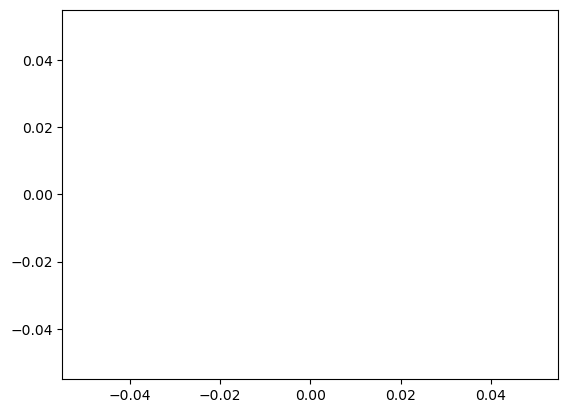

In [41]:
plt.plot(ccf)

In [42]:
ig_fac_ts_diff = np.diff(ig_fac_ts[:, ind_ig_plot], prepend=ig_fac_ts[0, ind_ig_plot])   # d(FAC)/dt, 
#ind_mpause = np.where((vg_coordinates[:,0] > 0) & (vg_r > 8*R_EARTH) & (vg_r < 12*R_EARTH))[0]
ind_mpause = np.where((vg_coordinates[:,0] > 0) & (vg_r > 8*R_EARTH) & (vg_r < 17*R_EARTH))[0]
ind_mpause = ind_mpause.tolist()
ind_mpause.append(242520) 
ind_mpause = np.array(ind_mpause )
ccf_max = 0.

# loop through magnetopause points (in vg grid), to see which are most correlated with the ig test point
vg_ccfs = np.zeros([vg_coordinates.shape[0]])

for i, i_m in enumerate(ind_mpause):
    #XO, ind_FTE = calc_XO_FTE(i_m, vg_coordinates, vg_lmn_nld_ts, vg_dBNdL_ts, nld = nld, r_range = [vg_r[i_m]-R_EARTH, vg_r[i_m]+R_EARTH], cleanup=True, nulls = 'O')  # TOO SLOW
    XO, ind_FTE = calc_XO_FTE(i_m, vg_coordinates, vg_lmn_nld_ts, vg_dBNdL_ts, nld = nld, r_range = None, cleanup=True, nulls = 'O')
    #print(i)
    #calculate cross correlation
    cid = cellid_ts[0,i_m]
    ccf = sm.tsa.stattools.ccf(XO,  ig_fac_ts[:, ind_ig_plot], adjusted=False)
    #ccf = sm.tsa.stattools.ccf(XO,  ig_fac_ts_diff, adjusted=False)
    ccf_temp = np.nanmax(np.abs(ccf))
    vg_ccfs[i_m] = ccf_temp
    if (ccf_temp > ccf_max) and len(np.where(XO <0)[0]) >= 3:
        print(i_m, ccf_max)
        ccf_max = np.nanmax([ccf_max, ccf_temp])
        #ylim2 = [-1e-8, 1e-8]   # for d/dt(FAC)
        #fig, ax1, ax2 = plot_2vars(time, XO, ig_fac_ts_diff, ylim1=[-1.5, 1.5], ylim2=ylim2, 
        #                           ylabel1=r'sign($dB_N/dL$) [X=1, O=-1]', ylabel2 = r'd/dt ig_fac $[A/m^2/s]$', 
        ylim2 = [-2e-7, 2e-7]   # for FAC
        fig, ax1, ax2 = plot_2vars(time, XO, ig_fac_ts[:, ind_ig_plot], ylim1=[-1.5, 1.5], ylim2=ylim2, 
                                   ylabel1=r'sign($dB_N/dL$) [X=1, O=-1]', ylabel2 = r'ig_fac $[A/m^2]$', 
        #ylim2 = [-2e-5, 2e-5]   # for E-field
        #fig, ax1, ax2 = plot_2vars(time, XO, ig_E_east_ts[:, ind_ig_plot], ylim1=[-1.5, 1.5], ylim2=ylim2, 
        #                           ylabel1=r'sign($dB_N/dL$) [X=1, O=-1]', ylabel2 = r'E_north $[V/m]$', 
                                   label1= 'M-sphere {} RE'.format(np.array2string(vg_coordinates[i_m, :] / R_EARTH, precision = 2)), 
                                   label2= 'I-sphere {} RE'.format(np.array2string(ig_testcoord / R_EARTH, precision=2)))
        for i_FTE in ind_FTE:   # XO lines (vertical markers)
            ax2.plot([START + i_FTE, START + i_FTE], ylim2, linestyle ='--', color = 'C2')
        plt.savefig('/wrk-vakka/users/horakons/carrington/plots/FHA/mp_io_coupling/mp_io_{}_vg_{}_cid_{}.png'.format(run, i_m, cid))
        plt.close()

ccf_max
#ind_mpause.size

28-Sep-24 01:11:15: /wrk-vakka/users/horakons/tmp/ipykernel_658904/3920447336.py:20: RuntimeWarning: All-NaN slice encountered
  ccf_temp = np.nanmax(np.abs(ccf))



1434790 0.0
1442166 0.07881771813445798
1442482 0.08002305438639937
1444464 0.08912788596356581
1460922 0.09139140108883168
1466255 0.0979514616724702
1471776 0.09810551962906157
1483505 0.09929022405732088
1510272 0.09996209536282451
1517256 0.12370815243467288
1518628 0.12440473209100153
1557174 0.12783148202174743
1592959 0.12907098474646592
1602139 0.13022265182258713
2293532 0.13286000307433085
3419723 0.1483192746468438
3946710 0.14863213297933822
3949167 0.1510233184708392
3951610 0.15677988429274065


0.15806385168310827

In [43]:
#Loop through magnetopause and ionosphere points

ig_theta_deg = ig_theta * 180. / np.pi
ig_phi_deg = ig_phi * 180. / np.pi

# Coordinate of interest (ig_)
# trace field lines starting from ionospheric coordinates theta, phi
#dayside aurora

ind = np.where( (np.abs(ig_phi_deg) < 30) &
                (np.abs(90 - ig_theta_deg) > 77) &
                (np.abs(90 - ig_theta_deg) < 83) )[0]


ig_fac_ts_diff = np.diff(ig_fac_ts[:, ind_ig_plot], prepend=ig_fac_ts[0, ind_ig_plot])   # d(FAC)/dt, 
#ind_mpause = np.where((vg_coordinates[:,0] > 0) & (vg_r > 8*R_EARTH) & (vg_r < 12*R_EARTH))[0]
ind_mpause = np.where((vg_coordinates[:,0] > 0) & (vg_r > 8*R_EARTH) & (vg_r < 17*R_EARTH))[0]
ind_mpause = ind_mpause.tolist()
ind_mpause.append(242520) 
ind_mpause = np.array(ind_mpause )
ccf_max = 0.

# loop through magnetopause points (in vg grid), to see which are most correlated with the ig test point
vg_ccfs = np.zeros([vg_coordinates.shape[0]])

for ind_ig_plot in enumerate(ind):
    print(i_m,', ',i,'/',ind.size,', ', ccf_max)
    for i, i_m in enumerate(ind_mpause):
        #XO, ind_FTE = calc_XO_FTE(i_m, vg_coordinates, vg_lmn_nld_ts, vg_dBNdL_ts, nld = nld, r_range = [vg_r[i_m]-R_EARTH, vg_r[i_m]+R_EARTH], cleanup=True, nulls = 'O')  # TOO SLOW
        XO, ind_FTE = calc_XO_FTE(i_m, vg_coordinates, vg_lmn_nld_ts, vg_dBNdL_ts, nld = nld, r_range = None, cleanup=True, nulls = 'O')
        #print(i)
        #calculate cross correlation
        cid = cellid_ts[0,i_m]
        ccf = sm.tsa.stattools.ccf(XO,  ig_fac_ts[:, ind_ig_plot], adjusted=False)
        #ccf = sm.tsa.stattools.ccf(XO,  ig_fac_ts_diff, adjusted=False)
        ccf_temp = np.nanmax(np.abs(ccf))
        vg_ccfs[i_m] = ccf_temp
        if ((ccf_temp > ccf_max) or (ccf_temp > 0.15)) and len(np.where(XO <0)[0]) >= 3 and (vg_coordinates[i_m, 2] * ig_coordinates[ind_ig_plot, 2] > 0):
            #print(i_m, ccf_max)
            ccf_max = np.nanmax([ccf_max, ccf_temp])
            #ylim2 = [-1e-8, 1e-8]   # for d/dt(FAC)
            #fig, ax1, ax2 = plot_2vars(time, XO, ig_fac_ts_diff, ylim1=[-1.5, 1.5], ylim2=ylim2, 
            #                           ylabel1=r'sign($dB_N/dL$) [X=1, O=-1]', ylabel2 = r'd/dt ig_fac $[A/m^2/s]$', 
            ylim2 = [-2e-7, 2e-7]   # for FAC
            fig, ax1, ax2 = plot_2vars(time, XO, ig_fac_ts[:, ind_ig_plot], ylim1=[-1.5, 1.5], ylim2=ylim2, 
                                       ylabel1=r'sign($dB_N/dL$) [X=1, O=-1]', ylabel2 = r'ig_fac $[A/m^2]$', 
            #ylim2 = [-2e-5, 2e-5]   # for E-field
            #fig, ax1, ax2 = plot_2vars(time, XO, ig_E_east_ts[:, ind_ig_plot], ylim1=[-1.5, 1.5], ylim2=ylim2, 
            #                           ylabel1=r'sign($dB_N/dL$) [X=1, O=-1]', ylabel2 = r'E_north $[V/m]$', 
                                       label1= 'M-sphere {} RE'.format(np.array2string(vg_coordinates[i_m, :] / R_EARTH, precision = 2)), 
                                       label2= 'I-sphere {} RE'.format(np.array2string(ig_coordinates[ind_ig_plot, :] / R_EARTH, precision=2)))
            for i_FTE in ind_FTE:   # XO lines (vertical markers)
                ax2.plot([START + i_FTE, START + i_FTE], ylim2, linestyle ='--', color = 'C2')
            plt.savefig('/wrk-vakka/users/horakons/carrington/plots/FHA/mp_io_coupling/mp_io_{}_vg_{}_ig_{}_cid_{}.png'.format(run, i_m, ind_ig_plot, cid))
            plt.close()

ccf_max
#ind_mpause.size


28-Sep-24 01:13:40: /wrk-vakka/users/horakons/tmp/ipykernel_658904/121408283.py:35: RuntimeWarning: All-NaN slice encountered
  ccf_temp = np.nanmax(np.abs(ccf))



2221098 0.0
2221467 0.07103617025193931
2222949 0.08669481621199612
2226114 0.08985512414920542
2242826 0.09511518793624525
2243945 0.10596649656441716
2243947 0.10684294729269664
2256069 0.1097175673067999
2290674 0.11348546574070868
2291044 0.1165250879926276
2293532 0.12168320824460295
3946710 0.1483192746468438
3949167 0.1510233184708392
3951610 0.15677988429274065
2853126 0.15806385168310827
2878241 0.15806385168310827
2908482 0.15806385168310827
2979093 0.15806385168310827
3564828 0.15806385168310827
3607436 0.15806385168310827
3650044 0.15806385168310827
3650577 0.15806385168310827
3735526 0.161721407284595
1584121 0.161721407284595
1513863 0.161721407284595
1528846 0.16584522770252433
1531584 0.16584522770252433
1544005 0.16907481096579113
1584121 0.16907481096579113
1595651 0.17602296790827016
1711903 0.17602296790827016
1782971 0.17602296790827016
3071695 0.17602296790827016
3073775 0.17602296790827016
3085504 0.17685269589685904
1549082 0.17685269589685904
1557174 0.17685269

: 

In [ ]:


# loop through ionosphere points (in ig grid), to see which are most correlated with the vg test point
ig_n = ig_coordinates.shape[0]
ig_ccfs = np.zeros(ig_n)
#XO, ind_FTE = calc_XO_FTE(ind_vg_plot, vg_coordinates, vg_lmn_nld_ts, vg_dBNdL_ts, nld = nld, r_range = [vg_r[ind_vg_plot]-R_EARTH, vg_r[ind_vg_plot]+R_EARTH], cleanup=True, nulls = 'O')
XO, ind_FTE = calc_XO_FTE(ind_vg_plot, vg_coordinates, vg_lmn_nld_ts, vg_dBNdL_ts, nld = nld, r_range = None, cleanup=True, nulls = 'O')


ccf_max = 0.


for i_i in range(ig_n):
    #calculate cross correlation
    ig_fac_ts_diff = np.diff(ig_fac_ts[:, i_i], prepend=ig_fac_ts[0, i_i])   # d(FAC)/dt, 
    #ccf = sm.tsa.stattools.ccf(XO,  ig_fac_ts_diff, adjusted=False)
    ccf = sm.tsa.stattools.ccf(XO,  ig_fac_ts[:, i_i], adjusted=False)
    ccf_temp = np.nanmax(np.abs(ccf))
    ig_ccfs[i_i] = ccf_temp
    if ccf_temp > ccf_max:
        ccf_max = np.nanmax([ccf_max, ccf_temp])
        print(i_i, ccf_max)
        ylim2 = [-1e-7, 1e-7]
        fig, ax1, ax2 = plot_2vars(time, XO, ig_fac_ts[:, i_i], ylim1=[-1.5, 1.5], ylim2=ylim2, 
                                   ylabel1=r'sign($dB_N/dL$) [X=1, O=-1]', ylabel2 = r'ig_fac $[A/m^2]$', 
        #fig, ax1, ax2 = plot_2vars(time, XO, ig_fac_ts_diff, ylim1=[-1.5, 1.5], ylim2=ylim2, 
        #                           ylabel1=r'sign($dB_N/dL$) [X=1, O=-1]', ylabel2 = r'ig_fac $[A/m^2]$', 
        #ylim2 = [-2e-7, 2e-7]   # for FAC
        #fig, ax1, ax2 = plot_2vars(time, XO, ig_fac_ts[:, ind_ig_plot], ylim1=[-1.5, 1.5], ylim2=ylim2, 
        #                            ylabel1=r'sign($dB_N/dL$) [X=1, O=-1]', ylabel2 = r'ig_fac $[A/m^2]$', 
        #ylim2 = [-2e-5, 2e-5]   # for E-field
        #fig, ax1, ax2 = plot_2vars(time, XO, ig_E_east_ts[:, ind_ig_plot], ylim1=[-1.5, 1.5], ylim2=ylim2, 
        #                            ylabel1=r'sign($dB_N/dL$) [X=1, O=-1]', ylabel2 = r'E_north $[V/m]$', 
                                    label1= 'M-sphere {} RE'.format(np.array2string(vg_testcoord / R_EARTH), precision = 2), 
                                    label2= 'I-sphere {} RE'.format(np.array2string(ig_coordinates[i_i, :] / R_EARTH), precision=2))
        for i_FTE in ind_FTE:   # XO lines (vertical markers)
            ax2.plot([START + i_FTE, START + i_FTE], ylim2, linestyle ='--', color = 'C2')
        plt.savefig('/wrk-vakka/users/horakons/carrington/plots/FHA/mp_io_coupling/mp_io_{}_ig_{}.png'.format(run, i_i))
        plt.close()

ccf_max


In [ ]:
vg_coordinates.shape

In [13]:
#fw[0,242520,:] / R_EARTH

In [ ]:
242520 in ind_mpause

In [ ]:
np.linalg.norm(vg_coordinates[242520,:]/R_EARTH)

In [ ]:
ig_ccfs.shape
i = np.argmin(np.abs(ig_ccfs - 0.10897546723564523))
ig_ccfs[i]
ig_coordinates[i]/R_EARTH
#fw[7, 2425420,:]/R_EARTH
#np.arctan(1.007 / 0.123) * 180 / np.pi


In [17]:
n_ig = ig_fac_ts.shape[1]
ig_ig_ccfs = np.zeros(n_ig)
for i in range(n_ig):
    ig_ig_ccfs[i] = np.nanmax(np.abs(sm.tsa.stattools.ccf(ig_fac_ts[:, i],  ig_fac_ts[:, ind_ig_plot], adjusted=False)))



In [ ]:
ig_coordinates.shape
ig_r, ig_theta, ig_phi = cartesian_to_spherical(ig_coordinates[:,0], ig_coordinates[:,1], ig_coordinates[:,2])
plt.scatter(ig_phi, ig_theta)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# data coordinates and values
x = ig_phi*180 /np.pi
y = ig_theta*180 / np.pi
z = ig_ig_ccfs

dphi = 0.2
dtheta = 0.2
# target grid to interpolate to
xi = np.arange(-180,180,dphi)
yi = np.arange(0,180,dtheta)
xi,yi = np.meshgrid(xi,yi)

# set mask
#mask = (xi > 0.5) & (xi < 0.6) & (yi > 0.5) & (yi < 0.6)

# interpolate
zi = griddata((x,y),z,(xi,yi),method='linear')

# mask out the field
#zi[mask] = np.nan

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.contourf(xi,yi,zi,np.arange(0,1.01,0.01), cmap='plasma')
#plt.plot(x,y,'k.')
plt.xlabel(r'$\phi$',fontsize=16)
plt.ylabel(r'$\theta$',fontsize=16)
#plt.savefig('interpolated.png',dpi=100)
#plt.close(fig)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from matplotlib import cm

#theta, phi = np.linspace(0, 2 * np.pi, 40), np.linspace(0, np.pi, 40)
#THETA, PHI = np.meshgrid(theta, phi)
deg2rad = np.pi/180.
R = yi*0 + R_EARTH
X = R * np.sin(yi*deg2rad) * np.cos(xi*deg2rad)
Y = R * np.sin(yi*deg2rad) * np.sin(xi*deg2rad)
Z = R * np.cos(yi*deg2rad)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
#ax.plot_surface(X, Y, Z, facecolors=plt.cm.jet(norm(zi)))
m = cm.ScalarMappable(cmap=plt.cm.plasma, norm=norm)
m.set_array([])
plt.colorbar(m)

ax.set_xlabel(r'x [$R_E$]')
ax.set_ylabel(r'y [$R_E$]')
ax.set_zlabel(r'z [$R_E$]')

ax.view_init(elev=80., azim=20)
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('plasma'),
    linewidth=0, antialiased=False, alpha=0.5, facecolors=plt.cm.plasma(norm(zi)))

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# setting up 'polar' projection and plotting
ax = plt.subplot(111, projection='polar')
#ax1.set_xticklabels(list(np.arange(18, 24, 3)) + list(np.arange(0, 18, 3)))
ax.set_xticks(list(np.arange(0, 2*np.pi, np.pi / 4)))
ax.set_xticklabels(list(np.arange(6, 24, 3)) + list(np.arange(0, 6, 3)))

i_thetamax = int(30./dtheta)
# plot northern polar cap (rotate by ninety-degrees so noon is at the top)
plt.pcolor(xi[0:i_thetamax,:]*deg2rad+ np.pi/2, yi[0:i_thetamax,:], zi[0:i_thetamax,:], cmap='plasma')

# overplot single point
plt.scatter(ig_phi[ind_ig_plot]+np.pi/2., ig_theta[ind_ig_plot]*180/np.pi, color = 'black')

plt.show()

In [ ]:
plt.plot(plt.cm.jet(norm(zi)).flatten())

In [ ]:
xi.shape

In [ ]:
ind_mpause = np.where((vg_coordinates[:,0] > 0) & (vg_r > 8*R_EARTH) & (vg_r < 17*R_EARTH))[0]
ind_mpause.size

In [ ]:
ind_mpause.tolist()

In [ ]:
3

In [ ]:
dct_XO_sidecar['CellID']

In [ ]:
print(np.min(vg_coordinates_ts[0,:,:]-vg_coordinates_ts[1,:,:]) )